In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
football_df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Football\\FIFA22_official_data.csv")

# DATA CLEANING

In [134]:
football_df['Body Type']

0                  Unique
1                  Unique
2                  Unique
3                  Unique
4        Stocky (170-185)
               ...       
16705       Normal (185+)
16706       Normal (185+)
16707      Lean (170-185)
16708       Normal (185+)
16709                 NaN
Name: Body Type, Length: 16710, dtype: object

In [135]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

We have to convert Value column from object to float

In [4]:
football_df['Value'] = football_df['Value'].str.split('€')
football_df['Value'] = football_df['Value'].apply(lambda x:x[1])

In [5]:
football_df['Wage'] = football_df['Wage'].str.split('€')
football_df['Wage'] = football_df['Wage'].apply(lambda x:x[1])

In [6]:
fifa_value_K = football_df.loc[football_df['Value'].str.endswith('K')]
fifa_value_K['Value'] = fifa_value_K['Value'].apply(lambda x: x[:-1])
fifa_value_K['Value'] = fifa_value_K['Value'].astype('float64')
fifa_value_K['Value'] = fifa_value_K['Value'] / 1000
fifa_value_K['Value'].sort_values(ascending=False)

C:\Users\HP\AppData\Local\Temp/ipykernel_25732/969682270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_value_K['Value'] = fifa_value_K['Value'].apply(lambda x: x[:-1])
C:\Users\HP\AppData\Local\Temp/ipykernel_25732/969682270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_value_K['Value'] = fifa_value_K['Value'].astype('float64')
C:\Users\HP\AppData\Local\Temp/ipykernel_25732/969682270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

12441    0.975
2167     0.975
13746    0.975
7874     0.975
13783    0.975
         ...  
16184    0.010
15027    0.007
1770     0.001
3009     0.001
3882     0.001
Name: Value, Length: 6465, dtype: float64

In [7]:
fifa_value_M = football_df.loc[football_df['Value'].str.endswith('M')]
fifa_value_M['Value'] = fifa_value_M['Value'].apply(lambda x: x[:-1])
fifa_value_M['Value'] = fifa_value_M['Value'].astype('float64')
fifa_value_M['Value'].sort_values(ascending=False)

C:\Users\HP\AppData\Local\Temp/ipykernel_25732/1641087684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_value_M['Value'] = fifa_value_M['Value'].apply(lambda x: x[:-1])
C:\Users\HP\AppData\Local\Temp/ipykernel_25732/1641087684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_value_M['Value'] = fifa_value_M['Value'].astype('float64')


82       194.0
251      137.5
39       129.5
64       129.0
3        125.5
         ...  
5633       1.0
12818      1.0
12845      1.0
12875      1.0
16607      1.0
Name: Value, Length: 9901, dtype: float64

In [8]:
fifa_value_M['Wage'] = fifa_value_M['Wage'].apply(lambda x: x[:-1] if x.endswith('K') else x)
fifa_value_M['Wage'] = fifa_value_M['Wage'].astype('float64')
fifa_value_M['Wage'] = fifa_value_M['Wage'] / 1000

C:\Users\HP\AppData\Local\Temp/ipykernel_25732/3868471948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_value_M['Wage'] = fifa_value_M['Wage'].apply(lambda x: x[:-1] if x.endswith('K') else x)
C:\Users\HP\AppData\Local\Temp/ipykernel_25732/3868471948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_value_M['Wage'] = fifa_value_M['Wage'].astype('float64')
C:\Users\HP\AppData\Local\Temp/ipykernel_25732/3868471948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [9]:
fifa = pd.concat([fifa_value_K,fifa_value_M])

In [10]:
football_df.drop(['Photo','Flag','Club Logo','Real Face','Special','Jersey Number','Marking','ID'],axis=1,inplace = True)

In [11]:
football_df.isnull().sum()

Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          264
Value                           0
Wage                            0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      29
Position                       26
Joined                       1512
Loaned From                 15578
Contract Valid Until          351
Height                          0
Weight                          0
Crossing                        0
Finishing                       0
HeadingAccuracy                 0
ShortPassing                    0
Volleys                        37
Dribbling                       0
Curve                          37
FKAccuracy                      0
LongPassing                     0
BallControl   

In [41]:
football_df['Best Position'].unique()

array(['CAM', 'CM', 'ST', 'LB', 'CDM', 'CB', 'RB', 'LM', 'RW', 'LW', 'CF',
       'LWB', 'RM', 'RWB', 'GK'], dtype=object)

In [12]:
Highest_Overall=football_df.sort_values(by='Overall', ascending=False).head(10)

In [ ]:
Highest_Overall

# PLAYER WITH HIGHEST OVERALL

[Text(0.5, 1.0, 'Highest Overall')]

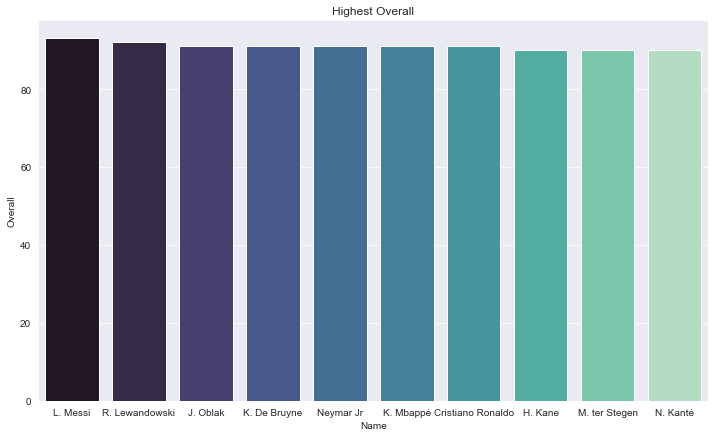

In [14]:
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
sns.barplot(data=Highest_Overall,x='Name',y='Overall',palette="mako").set(title="Highest Overall")

LIONEL MESSI IS THE PLAYER WITH HIGHEST OVERALL

# PLAYERS WITH MOST POTENTIAL

In [15]:
Highest_Potential=football_df.sort_values(by='Potential', ascending=False).head(10)
Highest_Potential

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
82,K. Mbappé,22,France,91,95,Paris Saint-Germain,194M,230K,Right,4.0,...,32.0,13.0,5.0,7.0,11.0,6.0,ST,92.0,€373.5M,26.0
251,E. Haaland,20,Norway,88,93,Borussia Dortmund,137.5M,110K,Left,4.0,...,30.0,7.0,14.0,13.0,11.0,7.0,ST,90.0,€244.1M,44.0
14608,G. Donnarumma,22,Italy,89,93,Paris Saint-Germain,119.5M,110K,Right,3.0,...,16.0,91.0,83.0,79.0,85.0,90.0,GK,89.0,€230M,20.0
14244,J. Oblak,28,Slovenia,91,93,Atlético de Madrid,112M,130K,Right,5.0,...,18.0,87.0,92.0,78.0,90.0,90.0,GK,91.0,€238M,27.0
29,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78M,320K,Left,5.0,...,24.0,6.0,11.0,15.0,14.0,8.0,RW,93.0,€144.3M,20.0
444,P. Foden,21,England,84,92,Manchester City,94.5M,125K,Left,3.0,...,47.0,8.0,15.0,6.0,10.0,13.0,CAM,87.0,€193.7M,58.0
33,R. Lewandowski,32,Poland,92,92,FC Bayern München,119.5M,270K,Right,5.0,...,19.0,15.0,6.0,12.0,8.0,10.0,ST,92.0,€197.2M,35.0
588,K. Havertz,22,Germany,84,92,Chelsea,94.5M,130K,Left,3.0,...,38.0,6.0,8.0,11.0,10.0,12.0,CAM,86.0,€193.7M,39.0
24,T. Alexander-Arnold,22,England,87,92,Liverpool,114M,150K,Right,3.0,...,79.0,14.0,15.0,14.0,6.0,7.0,RB,87.0,€219.5M,80.0
13890,M. ter Stegen,29,Germany,90,92,FC Barcelona,99M,250K,Right,4.0,...,10.0,88.0,85.0,88.0,88.0,90.0,GK,90.0,€210.4M,25.0


[Text(0.5, 1.0, 'Highest Potential')]

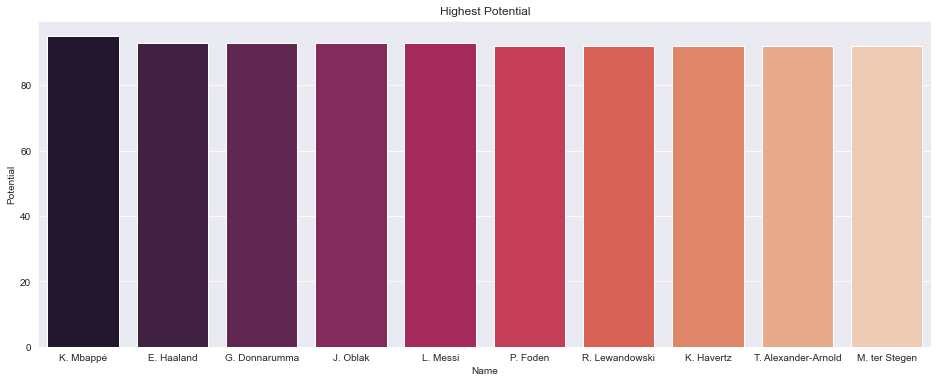

In [17]:
plt.figure(figsize=(16,6))
sns.barplot(data=Highest_Potential,x='Name',y='Potential',palette="rocket").set(title="Highest Potential")

KYLIAN MBAPPE IS THE PLAYER WITH MOST POTENTIAL

# EXPENSIVE PLAYERS ON MARKET

In [19]:
expensive_players = fifa_value_M.sort_values(by=['Value'],ascending=False).head(10)
expensive_players

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
82,231747,K. Mbappé,22,https://cdn.sofifa.com/players/231/747/22_60.png,France,https://cdn.sofifa.com/flags/fr.png,91,95,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/30.png,...,32.0,13.0,5.0,7.0,11.0,6.0,ST,92.0,€373.5M,26.0
251,239085,E. Haaland,20,https://cdn.sofifa.com/players/239/085/22_60.png,Norway,https://cdn.sofifa.com/flags/no.png,88,93,Borussia Dortmund,https://cdn.sofifa.com/teams/22/30.png,...,30.0,7.0,14.0,13.0,11.0,7.0,ST,90.0,€244.1M,44.0
39,202126,H. Kane,27,https://cdn.sofifa.com/players/202/126/22_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,90,90,Tottenham Hotspur,https://cdn.sofifa.com/teams/18/30.png,...,38.0,8.0,10.0,11.0,14.0,11.0,ST,90.0,€246.1M,50.0
64,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/30.png,...,29.0,9.0,9.0,15.0,15.0,11.0,LW,91.0,€238.7M,35.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
14608,230621,G. Donnarumma,22,https://cdn.sofifa.com/players/230/621/22_60.png,Italy,https://cdn.sofifa.com/flags/it.png,89,93,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/30.png,...,16.0,91.0,83.0,79.0,85.0,90.0,GK,89.0,€230M,20.0
17,228702,F. de Jong,24,https://cdn.sofifa.com/players/228/702/22_60.png,Netherlands,https://cdn.sofifa.com/flags/nl.png,87,92,FC Barcelona,https://cdn.sofifa.com/teams/241/30.png,...,77.0,7.0,13.0,10.0,10.0,9.0,CM,89.0,€253.9M,76.0
33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,19.0,15.0,6.0,12.0,8.0,10.0,ST,92.0,€197.2M,35.0
855,233049,J. Sancho,21,https://cdn.sofifa.com/players/233/049/22_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,87,91,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,32.0,7.0,11.0,10.0,11.0,13.0,CAM,88.0,€224.3M,32.0
24,231281,T. Alexander-Arnold,22,https://cdn.sofifa.com/players/231/281/22_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,87,92,Liverpool,https://cdn.sofifa.com/teams/9/30.png,...,79.0,14.0,15.0,14.0,6.0,7.0,RB,87.0,€219.5M,80.0


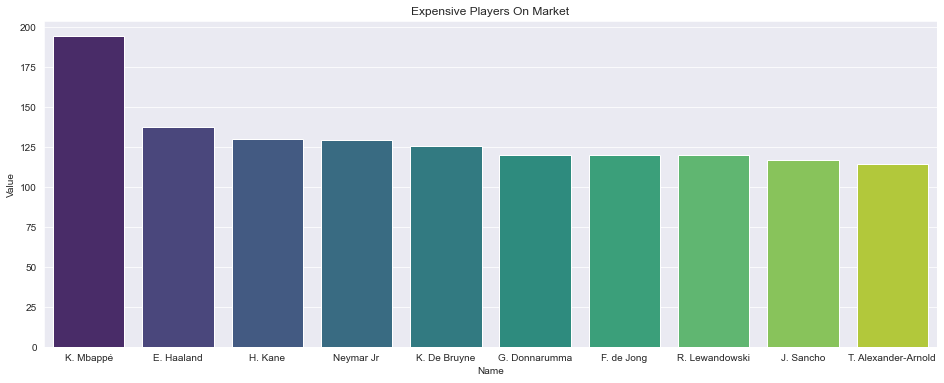

In [20]:
plt.figure(figsize=(16,6))
sns.barplot(data=expensive_players,x='Name',y='Value',palette="viridis").set(title="Expensive Players On Market")
plt.show()

KYLIAN MBAPPE IS THE MOST EXPENSIVE PLAYER ON TRANSFER MARKET

# EXPENSIVE PLAYERS ACCORDING TO POSITIONS

<Figure size 1224x432 with 0 Axes>

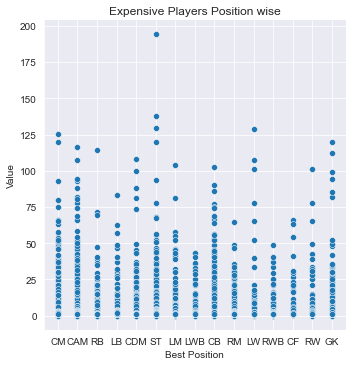

In [21]:
plt.figure(figsize=(17,6))
sns.relplot(data=fifa,x='Best Position',y='Value').set(title='Expensive Players Position wise')
plt.show()

STRIKERS AND LEFT WINGERS ARE SOME EXPENSIVE PLAYERS TO BUY

# COMPARING PLAYERS:   1) MESSI VS RONALDO

In [39]:
comp = football_df.set_index('Name')

In [40]:
rows = ['Cristiano Ronaldo','L. Messi']

In [41]:
mvr= comp.loc[rows]
messi_ronaldo= mvr[['Crossing','Finishing','Dribbling','BallControl','ShotPower','Strength','Overall']]

In [42]:
messi_ronaldo
messi_ronaldo.reset_index(inplace=True)

In [43]:
messi_ronaldo= pd.melt(messi_ronaldo,id_vars=["Name"],value_vars=['Crossing','Finishing','Dribbling','BallControl','ShotPower','Strength','Overall'])

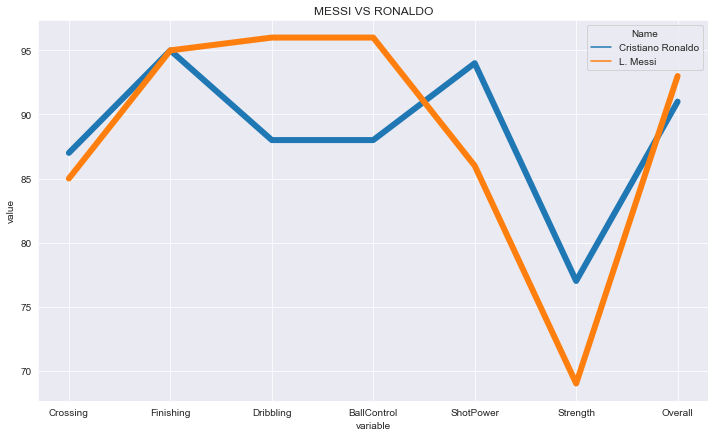

In [71]:
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
sns.lineplot(x='variable',y='value',data=messi_ronaldo,hue='Name',markers=True,estimator=None,linewidth=6).set(title='MESSI VS RONALDO')
plt.show()

AS WE CAN SEE MESSI HAS GOT BETTER DRIBBLING, BALL CONTROL, OVERALL
WHILE RONALDO HAS GOT BETTER CROSSING, SHOTPOWER, STRENGTH

# 2) MBAPPE VS HAALAND 

In [81]:
row1=['K. Mbappé','E. Haaland']

In [86]:
hvm = hvm.loc[row1]
hvm = hvm[['Crossing','Finishing','Dribbling','BallControl','ShotPower','Strength','Overall']]
hvm.reset_index(inplace=True)

In [87]:
hvm= pd.melt(hvm,id_vars=["Name"],value_vars=['Crossing','Finishing','Dribbling','BallControl','ShotPower','Strength','Overall'])

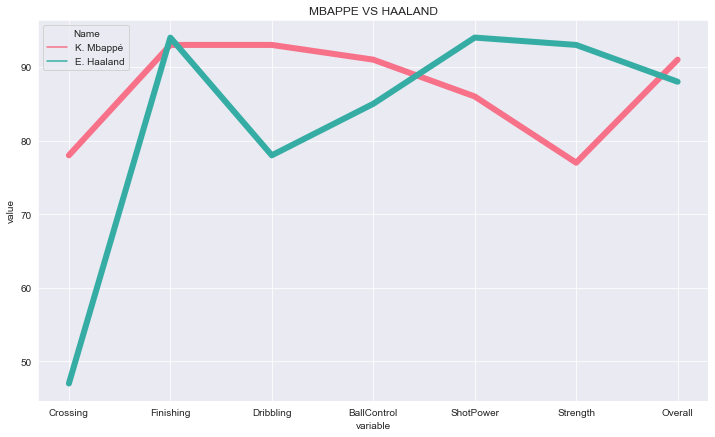

In [107]:
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
sns.lineplot(x='variable',y='value',data=hvm,hue='Name',markers=True,estimator=None,linewidth=6,palette="husl").set(title='MBAPPE VS HAALAND')
plt.show()

    HERE WE CAN SEE MBAPPE HAS BETTER CROSSING, DRIBBLING, BALL CONTROL AND OVERALL
    WHILE HAALAND HAS BETTER FINISHING, SHOT POWER, STRENGTH
    "If a team wants a striker go with Haaland and if they want a winger then go with Mbappe" 

# 3) NEYMAR JR VS M. SALAH

In [27]:
row2=['Neymar Jr','M. Salah']
nvs = football_df.set_index('Name')

In [28]:
nvs = nvs.loc[row2]
nvs = nvs[['Crossing','Finishing','Dribbling','BallControl','ShotPower','Strength','Overall']]
nvs.reset_index(inplace=True)

In [29]:
nvs= pd.melt(nvs,id_vars=["Name"],value_vars=['Crossing','Finishing','Dribbling','BallControl','ShotPower','Strength','Overall'])

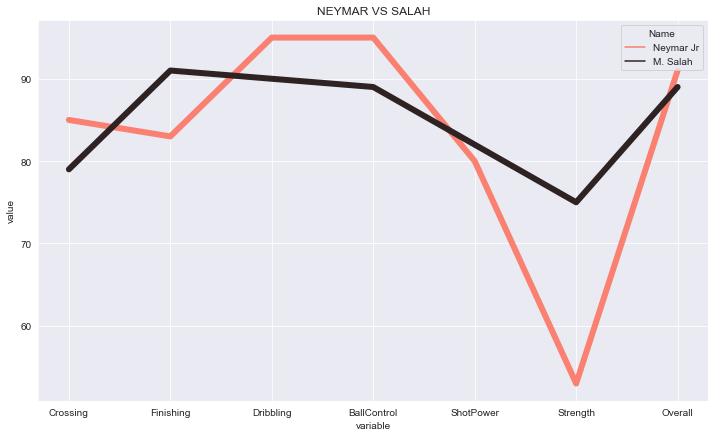

In [30]:
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
sns.lineplot(x='variable',y='value',data=nvs,hue='Name',markers=True,estimator=None,linewidth=6,palette="dark:salmon_r").set(title='NEYMAR VS SALAH')
plt.show()

HERE WE CAN SEE NEYMAR AND SALAH BOTH ARE PRETTY GOOD WITH BALL, NEYMAR HAS SLIGHT EDGE OVER SALAH BUT IN STRENGTH SALAH IS BETTER THAN NEYMAR. 

# 4) K.DE BRUYNE VS L. MODRIC 

In [120]:
row3=['K. De Bruyne','L. Modrić']
kvm = football_df.set_index('Name')
kvm = kvm.loc[row3]
kvm = kvm[['Crossing','Finishing','Dribbling','BallControl','ShotPower','Strength','Overall']]
kvm.reset_index(inplace=True)

In [121]:
kvm= pd.melt(kvm,id_vars=["Name"],value_vars=['Crossing','Finishing','Dribbling','BallControl','ShotPower','Strength','Overall'])

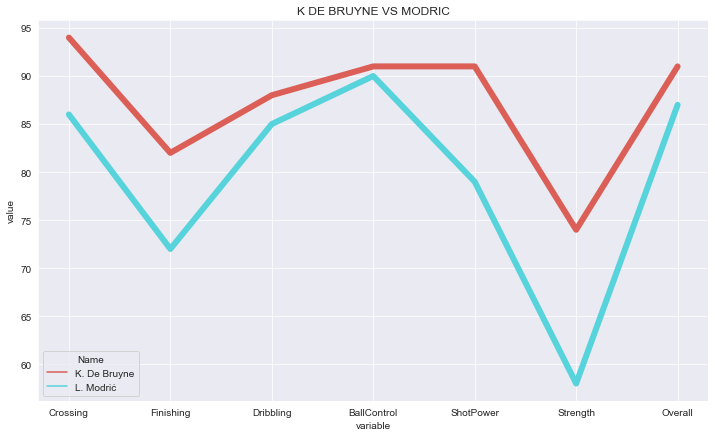

In [122]:
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
sns.lineplot(x='variable',y='value',data=kvm,hue='Name',markers=True,estimator=None,linewidth=6,palette="hls").set(title='K DE BRUYNE VS MODRIC')
plt.show()

AS WE CAN SEE DE BRUYNE IS BETTER THAN MODRIC IN EVERY ASPECT

# 5) LEWANDOWSKI VS BENZEMA

In [22]:
row4=['R. Lewandowski','K. Benzema']
rvb = football_df.set_index('Name')
rvb = rvb.loc[row4]
rvb = rvb[['Crossing','Finishing','Dribbling','BallControl','ShotPower','Strength','Overall']]
rvb.reset_index(inplace=True)

In [23]:
rvb= pd.melt(rvb,id_vars=["Name"],value_vars=['Crossing','Finishing','Dribbling','BallControl','ShotPower','Strength','Overall'])

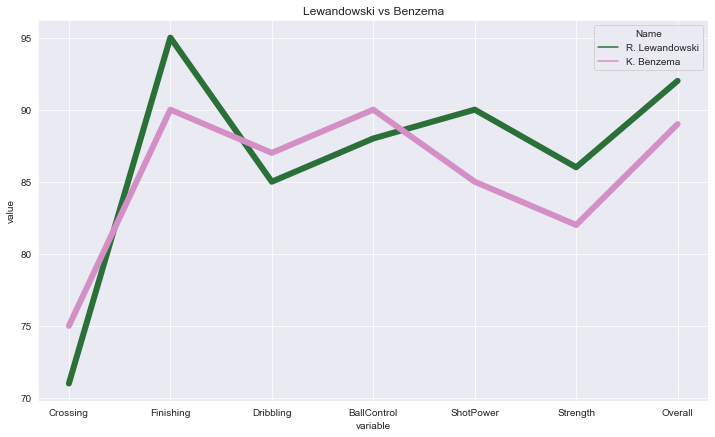

In [25]:
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
sns.lineplot(x='variable',y='value',data=rvb,hue='Name',markers=True,estimator=None,linewidth=6,palette="cubehelix").set(title='Lewandowski vs Benzema')
plt.show()

BENZEMA IS GOOD ON BALL BUT LEWANDOWSKI IS A BETTER STRIKER OVERALL. (ACCORDING TO THIS DATA)

# TEAM VALUE

In [54]:
psg = fifa[fifa['Club']=='Paris Saint-Germain']
mc =fifa[fifa['Club']=='Manchester City']
ts =fifa[fifa['Club']=='Tottenham Hotspur']
liv=fifa[fifa['Club']=='Liverpool']
che=fifa[fifa['Club']=='Chelsea']
man=fifa[fifa['Club']=='Manchester United']
real=fifa[fifa['Club']=='Real Madrid CF']
Fcb = fifa[fifa['Club']=='FC Barcelona']
bay = fifa[fifa['Club']=='FC Bayern München']

In [56]:
clubs = pd.concat([psg,mc,ts,liv,che,man,real,Fcb,bay])

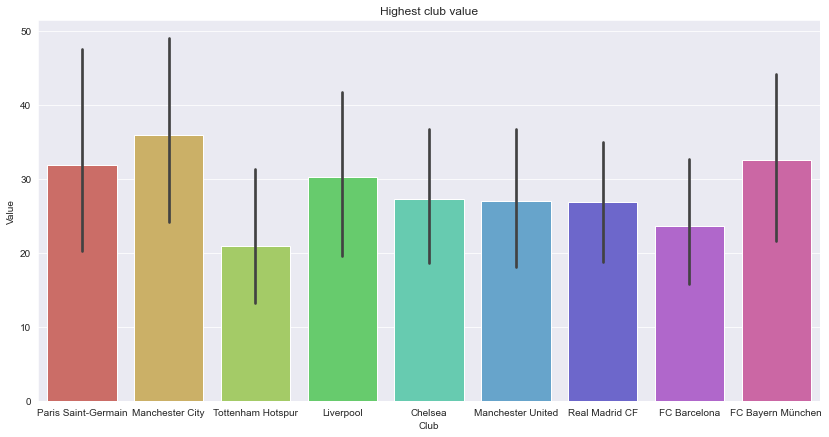

In [81]:
plt.figure(figsize=(14,7))
sns.set_style('darkgrid')
sns.barplot(x='Club',y='Value',data=clubs,palette="hls").set(title='Highest club value')
plt.show()

Manchester City has the highest team value followed by PSG and Bayern

# AVERAGE AGE OF PLAYERS

In [33]:
pos= football_df.groupby(by='Best Position')['Age'].mean()
pos

Best Position
CAM    23.941897
CB     26.252645
CDM    26.920761
CF     30.536585
CM     26.327399
GK     27.108021
LB     25.905289
LM     25.038926
LW     26.664835
LWB    24.242215
RB     26.102804
RM     24.061691
RW     26.961194
RWB    24.296774
ST     25.777168
Name: Age, dtype: float64

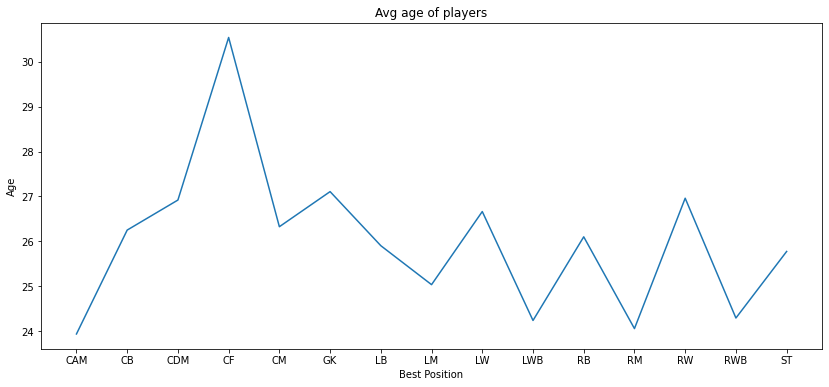

In [36]:
plt.figure(figsize=(14,6))
sns.lineplot(data=pos).set(title='Avg age of players')
plt.show()

SO LOOKS LIKE CENTER FORWARDS(CF) ARE THE OLDEST OR WE CAN SAY THE ONES WITH MORE EXPERIENCE AND CENTER ATTACKING MIDFIELDERS(CAM) ARE THE YOUNGEST. 